In [1]:
import sympy as sym
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
sns.set()


# Geometrical constants and prescribed velocity

In the first step, the geometrical and kinematical parameters are set. They are numerical expressions. In order to separate expressions from symbols, for symbolic computing, expressions have an underline, i.e. R1_ is an expression and R1 is a symbol.

In [2]:
relativeEccentrcity = 0.5
R2_ = 7.6
R1_ = 5
shift = (R2_-R1_)*relativeEccentrcity
u_R_ = 0.4


# symbols

In the next step, the symbols for algebraic manupulation are defined.

In [3]:
x, y, z = sym.symbols('x,y,z', real=True)
R1, R2, b = sym.symbols('R1, R2, b', real=True)
R, a, x1, x2, l, delta = sym.symbols('R, a, x1,x2,l, delta', real=True)
u_R, xi, eta, rho, mu = sym.symbols('u_R, xi, eta, rho, mu', real=True)


# Moebius Transform

Now, the conformal mapping is defined, that transforms the eccentric annular domain into a concentric annular domain. This kind of mapping is of type Möbius transform or bilinear transfrom.

In [4]:
w = (z+sym.I*a)/(a*z+sym.I)
w


(I*a + z)/(a*z + I)

In [5]:
# scaling, outer radius to 1

w = w.subs(z, x/R2+sym.I*y/R2)
w


(I*a + x/R2 + I*y/R2)/(a*(x/R2 + I*y/R2) + I)

## Separation of real and imaginary part

In order to obtain the new cartesian coordinates $\xi$ (real part) and $\eta$ (imaginary part) in the so called w-plane, in which the annular domain is concentric, the function $w$ has to be split into real and imaginary parts.

In [6]:
xi_ = sym.simplify(sym.re(w))
xi_


(a*x**2 + (R2 + a*y)*(R2*a + y))/(a**2*x**2 + (R2 + a*y)**2)

In [7]:
eta_ = sym.simplify(sym.im(w))
eta_


x*(-R2 - a*y + a*(R2*a + y))/(a**2*x**2 + (R2 + a*y)**2)

# Constants from literature

The constants $a$ (appears in the conformal mapping) and the resulting new outer radius $R$, are described in the following lines. They are sligthly modified variants from [BC09].

In [8]:
# a and R from Churchill, Brown

a_ = (1+x1*x2+sym.sqrt((1-x1**2)*(1-x2**2)))/(x1+x2)
a_ = a_.subs(x2, (b-R1))
a_ = a_.subs(x1, (R1+b))
a_ = a_.subs(R1, R1/R2)
a_ = a_.subs(b, b/R2)

R_ = (1-x1*x2+sym.sqrt((1-x1**2)*(1-x2**2)))/(x1-x2)
R_ = R_.subs(x2, (b-R1))
R_ = R_.subs(x1, (R1+b))
R_ = R_.subs(R1, R1/R2)
R_ = R_.subs(b, b/R2)


# Velocity in concentric annulus in w-plane

The velocity in the w-plane, $$u(\rho)=\frac{u_{R} \ln{\left(\rho \right)}}{\ln{\left(R \right)}}$$

in the concentric annulus is visualized in the following cell, where $\rho=\sqrt{\xi^2+\eta^2}$.

/tmp/ipykernel_89/679128845.py:20: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(Xi, Eta, uwNum(Xi, Eta), cmap='rainbow')


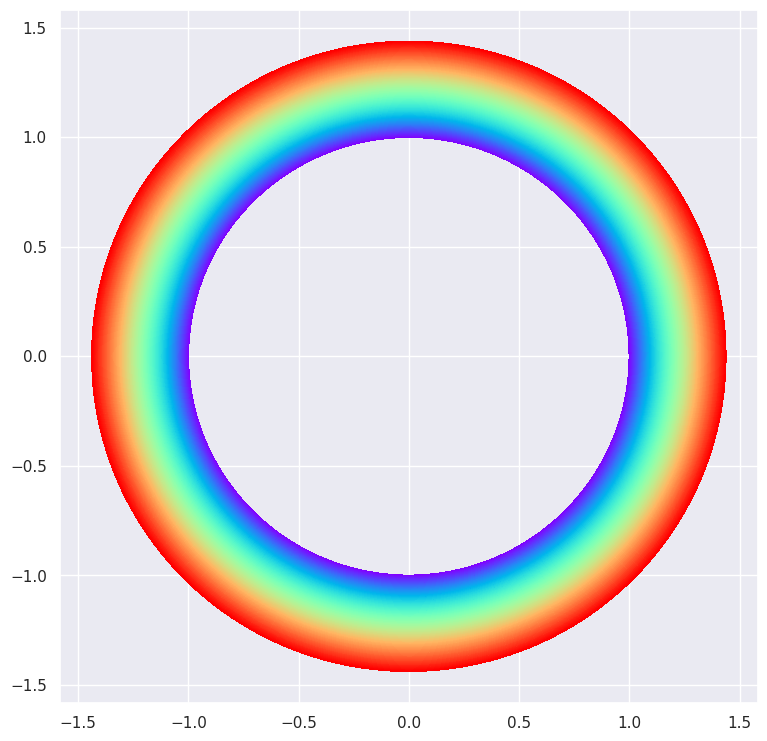

In [9]:
# Velocity in concentric annulus in w-plane
uw = u_R*sym.ln(sym.sqrt(xi**2+eta**2))/sym.ln(R)
uwNum = uw.subs(R, R_)
uwNum = uwNum.subs(u_R, u_R_).subs(R1, R1_)
uwNum = uwNum.subs(R2, R2_).subs(b, shift)
uwNum = sym.lambdify((xi, eta), uwNum)


# Plotting in w-Plane
RNum = R_.subs(R1, R1_).subs(R2, R2_)
RNum = float(RNum.subs(b, shift))
rho_ = np.linspace(1, RNum, 200)
theta = np.linspace(0, 2*np.pi, 200)
Rho, Theta = np.meshgrid(rho_, theta)
Xi = Rho * np.cos(Theta)
Eta = Rho * np.sin(Theta)
fig, ax = plt.subplots(figsize=(9, 9))
ax.set_xlim(left=-RNum*1.1, right=RNum*1.1)
ax.set_ylim(bottom=-RNum*1.1, top=RNum*1.1)
plt.pcolor(Xi, Eta, uwNum(Xi, Eta), cmap='rainbow')


# Velocity in eccentric annulus in z-plane

Expressing $\xi$ and $\eta$ in $x$ and $y$, the previous velocity can be plotted evaluated and plotted in the z-plane, i.e. in the original geometry: The eccentric annulus!

/tmp/ipykernel_89/1946387221.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(X, Y, uzNum(X, Y), cmap='rainbow')


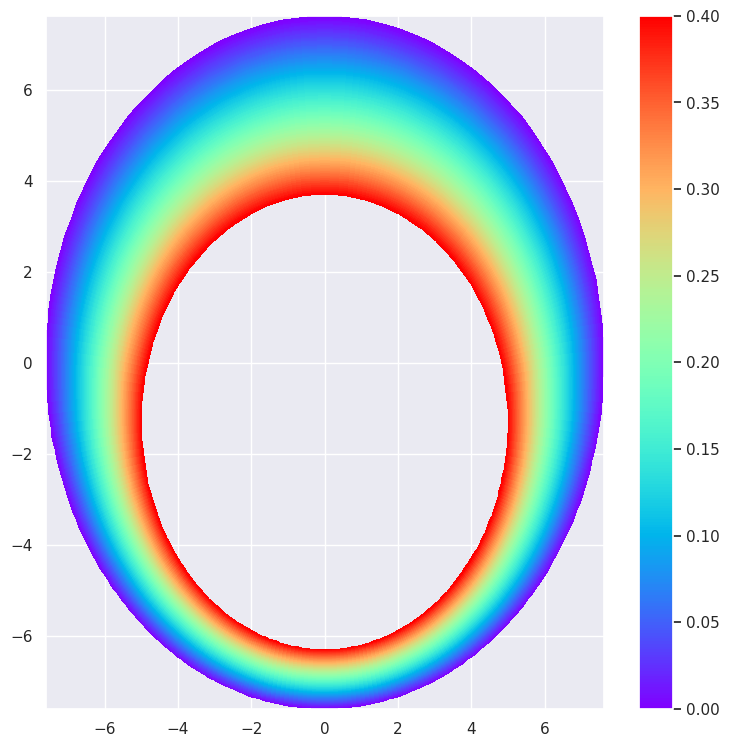

In [17]:
# Velocity in eccentric annulus in z-plane

uzNum = uw.subs(xi, xi_).subs(eta, eta_)
uzNum = uzNum.subs(a, a_)
uzNum = uzNum.subs(R, R_)
uzNum = uzNum.subs(u_R, u_R_).subs(R1, R1_)
uzNum = uzNum.subs(R2, R2_).subs(b, shift)
uzNum = sym.lambdify((x, y), uzNum)


# Geometry creation and plotting

F = (R2_**2-R1_**2+shift**2)/(2*shift)
M = np.sqrt(F**2-R2_**2)
alpha = 0.5*np.log((F+M)/(F-M))
beta = 0.5*np.log((F-shift+M)/(F-shift-M))
yShift1 = float((M*sym.coth(alpha).evalf()))
X = np.linspace(-np.pi, np.pi, 200)
Y = np.linspace(alpha, beta, 200)
X, Y = np.meshgrid(X, Y)
zeta = X + 1j*Y
x_y = M*np.tan(zeta/2)
X = np.real(x_y)
Y = np.imag(x_y)-yShift1
fig, ax = plt.subplots(figsize=(9, 9))
plt.pcolormesh(X, Y, uzNum(X, Y), cmap='rainbow')
plt.colorbar()


# Postprocessing


## Force calculation with ```diff```


Following [LGK21], the flow force acting upon the inner cylinder (for example armature or spool) can be obtained from the fluid velocity. 

In [11]:
uw_p = u_R*sym.ln(rho)/sym.ln(R)
uw_p


u_R*log(rho)/log(R)

In [12]:
F = -2*sym.pi*mu*l*rho*sym.diff(uw_p, rho)
F


-2*pi*l*mu*u_R/log(R)

In [13]:
print(F)


-2*pi*l*mu*u_R/log(R)


## Taylor expansion in the gap $\delta$ with ```series``` in the concentric case ($b=0$)

Finally, for the concentric case, a Taylor expansion in the annular gap $\delta=R_2-R_1$ around zero is carried out with SymPy, in order to see how the small-gap-limit flow force looks like in the concentric case. 

In [14]:
R_.subs(b, 0)


R2*(R1**2/R2**2 + sqrt((-R1**2/R2**2 + 1)**2) + 1)/(2*R1)

hence:

$$F(b=0)=- \frac{2 \pi l \mu u_{R}}{\log{\left(\frac{R_2}{R_1} \right)}}$$

In [15]:
F = -2*sym.pi*l*mu*u_R/sym.ln(R2/R1)
F


-2*pi*l*mu*u_R/log(R2/R1)

In [16]:
sym.series(F.subs(R2, R1+delta), delta, 0, 2)


pi*delta*l*mu*u_R/(6*R1) - pi*l*mu*u_R - 2*pi*R1*l*mu*u_R/delta + O(delta**2)

## Literature

[BC09] [Brown JW, Churchill RV. Complex variables and applications eighth edition, McGraw-Hill Book Company; 2009](https://www.mheducation.com/highered/product/complex-variables-applications-brown-churchill/M9780073383170.html)

[LGK21] [Lauer-Baré Z., Gaertig E., Krebs J., Arndt C., Sleziona A., Gensel A. A note on leakage jet forces: Application in the modelling of digital twins of hydraulic valves, International Journal of Fluid Power, 2021, Vol. 22 (1), 113–146](https://journals.riverpublishers.com/index.php/IJFP/article/view/5535)

[LG21](https://conference.scipy.org/proceedings/scipy2021/lauer_bare_gaertig.html)Lauer-Baré Z. and Gaertig E., *Conformal Mappings with SymPy: Towards Python-driven Analytical Modeling in Physics*, PROC. OF THE 20th PYTHON IN SCIENCE CONF. (SCIPY 2021)

[LGKS23](https://publications.rwth-aachen.de/record/957191) Lauer-Baré Z., Gaertig E., Krebs J., Sleziona C. Analytical formulae in fluid power, quo vadis in times of CFD and I4.0? 13th International Fluid Power Conference, p. 866-879, 2023